# Kidney-Stone-Prediction-Classifier

This model is a binary classification model that predicts whether a patient is likely to have kidney stones or not. It uses various numerical features such as age, medical history, and other factors to make this prediction. The model has been trained on a dataset containing 414 entries and tested on a separate dataset containing 276 entries. The code for the model is written in Python using popular libraries such as Pandas and Scikit-learn. The model has been designed to help healthcare professionals predict kidney stones in patients and improve treatment outcomes.





# Importing library

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.metrics import f1_score, accuracy_score, precision_score,recall_score,roc_curve,precision_recall_curve, roc_auc_score,balanced_accuracy_score,make_scorer,classification_report,cohen_kappa_score,confusion_matrix,auc,average_precision_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier, ExtraTreesClassifier,VotingClassifier
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.preprocessing import OneHotEncoder, FunctionTransformer,StandardScaler,OrdinalEncoder,MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split,RandomizedSearchCV,StratifiedKFold,GridSearchCV,learning_curve,cross_val_score,RepeatedStratifiedKFold
import warnings
warnings.filterwarnings('ignore')



# Load the data

In [ ]:
train=pd.read_csv("train.csv")
sample=pd.read_csv("sample_submission.csv")
test=pd.read_csv("test.csv")

#clean the data or fill with it nan
train.replace(to_replace=["?", " "], value=np.nan, inplace=True)

# Analysis the data

In [ ]:
print('train data','\n''---------------------------------------\n')
print(train.info())
print('\n\n')
print('test data','\n''---------------------------------------\n')
print(test.info())

train data 
---------------------------------------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       414 non-null    int64  
 1   gravity  414 non-null    float64
 2   ph       414 non-null    float64
 3   osmo     414 non-null    int64  
 4   cond     414 non-null    float64
 5   urea     414 non-null    int64  
 6   calc     414 non-null    float64
 7   target   414 non-null    int64  
dtypes: float64(4), int64(4)
memory usage: 26.0 KB
None



test data 
---------------------------------------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 276 entries, 0 to 275
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       276 non-null    int64  
 1   gravity  276 non-null    float64
 2   ph       276 non-null    float64
 3   osmo     276 non-null    int64  
 4   cond     276 no

In [ ]:
print('train data','\n''---------------------------------------\n')
train.describe(include='all')

train data 
---------------------------------------



,id,gravity,ph,osmo,cond,urea,calc,target
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,206.500000,1.017894,5.955459,651.545894,21.437923,278.657005,4.114638,0.444444
std,119.655756,0.006675,0.642260,234.676567,7.514750,136.442249,3.217641,0.497505
min,0.000000,1.005000,4.760000,187.000000,5.100000,10.000000,0.170000,0.000000
25%,103.250000,1.012000,5.530000,455.250000,15.500000,170.000000,1.450000,0.000000
50%,206.500000,1.018000,5.740000,679.500000,22.200000,277.000000,3.130000,0.000000
75%,309.750000,1.022000,6.280000,840.000000,27.600000,385.000000,6.630000,1.000000
max,413.000000,1.040000,7.940000,1236.000000,38.000000,620.000000,14.340000,1.000000


In [ ]:
print('test data','\n''---------------------------------------\n')
test.describe(include='all')

test data 
---------------------------------------



,id,gravity,ph,osmo,cond,urea,calc
count,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000
mean,551.500000,1.018330,5.939312,654.891304,21.886594,280.985507,4.076848
std,79.818544,0.006569,0.607143,236.361932,7.346069,134.877856,3.088524
min,414.000000,1.005000,4.900000,187.000000,5.100000,64.000000,0.170000
25%,482.750000,1.014000,5.530000,456.000000,17.400000,168.500000,1.527500
50%,551.500000,1.019000,5.730000,658.000000,23.600000,282.000000,3.230000
75%,620.250000,1.023250,6.210000,843.250000,27.600000,385.000000,5.540000
max,689.000000,1.034000,7.940000,1236.000000,38.000000,620.000000,14.340000


In [ ]:
train.head()

,id,gravity,ph,osmo,cond,urea,calc,target
0,0,1.013,6.19,443,14.8,124,1.45,0
1,1,1.025,5.40,703,23.6,394,4.18,0
2,2,1.009,6.13,371,24.5,159,9.04,0
3,3,1.021,4.91,442,20.8,398,6.63,1
4,4,1.021,5.53,874,17.8,385,2.21,1


In [ ]:
test.head()

,id,gravity,ph,osmo,cond,urea,calc
0,414,1.017,5.24,345,11.5,152,1.16
1,415,1.020,5.68,874,29.0,385,3.46
2,416,1.024,5.36,698,19.5,354,13.00
3,417,1.020,5.33,668,25.3,252,3.46
4,418,1.011,5.87,567,29.0,457,2.36


In [ ]:
sample.head()

,id,target
0,414,0.5
1,415,0.5
2,416,0.5
3,417,0.5
4,418,0.5


# Analysis the train data in terms of values



In [ ]:
for column in train.columns:
  print(column,'\n''---------------------------------------\n',train[column].value_counts(),'\n\n')

id 
---------------------------------------
 0      1
272    1
282    1
281    1
280    1
      ..
135    1
134    1
133    1
132    1
413    1
Name: id, Length: 414, dtype: int64 


gravity 
---------------------------------------
 1.021    51
1.017    49
1.020    31
1.025    30
1.008    29
1.011    28
1.024    24
1.015    21
1.010    20
1.018    14
1.014    13
1.019    10
1.023    10
1.026    10
1.022     9
1.013     9
1.012     9
1.007     9
1.009     8
1.034     6
1.028     6
1.033     4
1.031     4
1.005     3
1.040     3
1.006     2
1.029     1
1.027     1
Name: gravity, dtype: int64 


ph 
---------------------------------------
 5.53    34
5.68    16
6.13    13
5.58    13
6.19    12
        ..
6.90     1
5.90     1
5.96     1
7.30     1
5.63     1
Name: ph, Length: 71, dtype: int64 


osmo 
---------------------------------------
 577    23
874    23
781    12
840    11
364    10
       ..
251     1
873     1
312     1
933     1
749     1
Name: osmo, Length: 80, dtype: int64 



## Calculating the number of nan values

In [ ]:
train.isna().sum()

id         0
gravity    0
ph         0
osmo       0
cond       0
urea       0
calc       0
target     0
dtype: int64

In [ ]:
train.duplicated().sum()

0

# Analysis the train data using barcharts


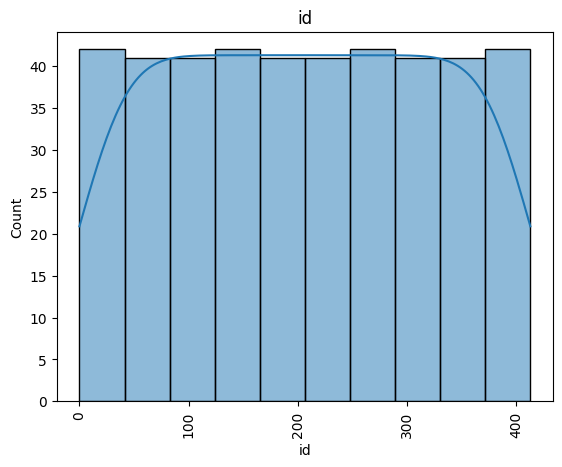

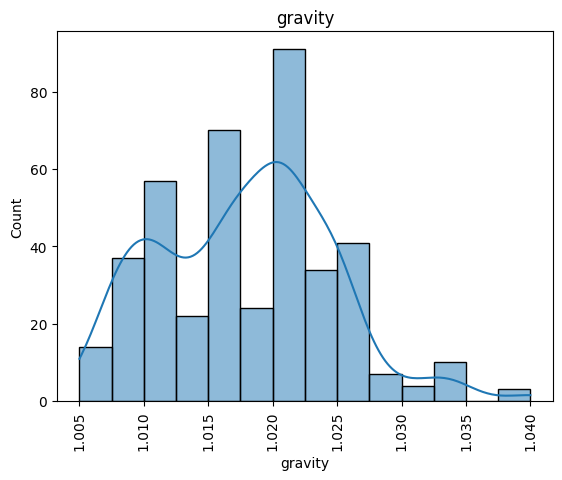

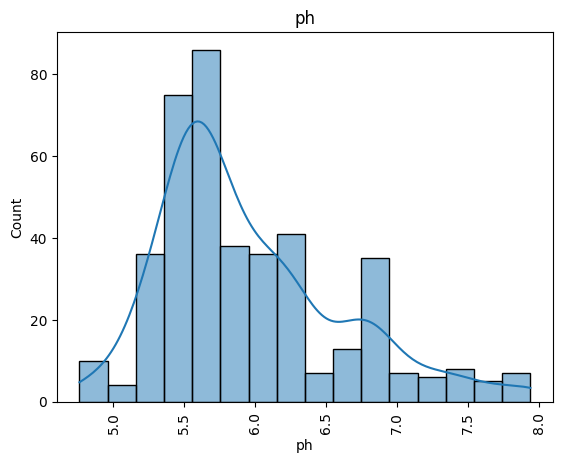

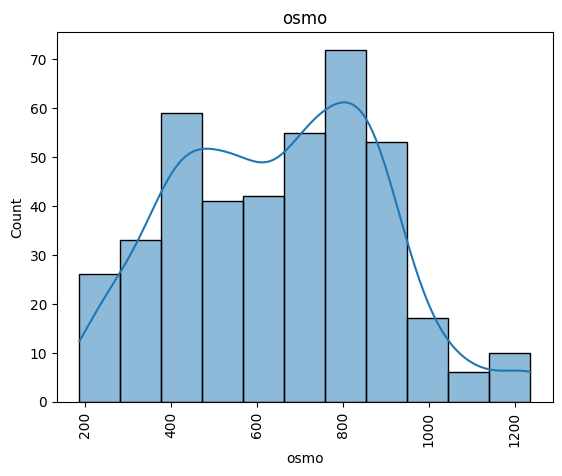

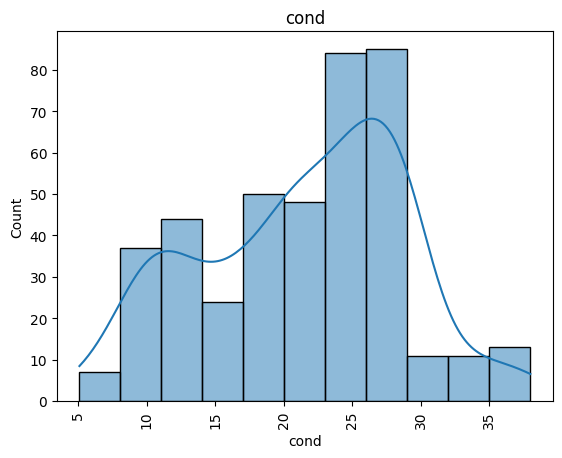

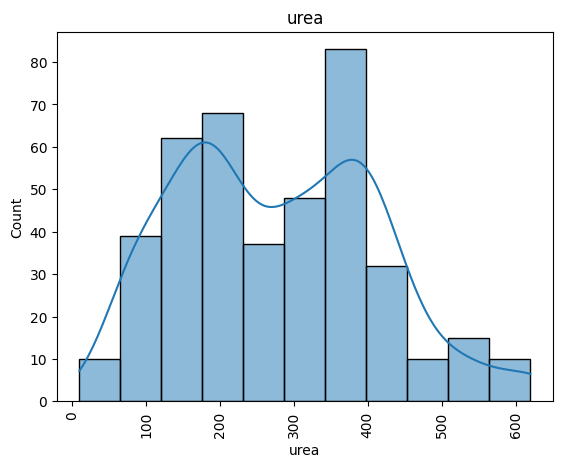

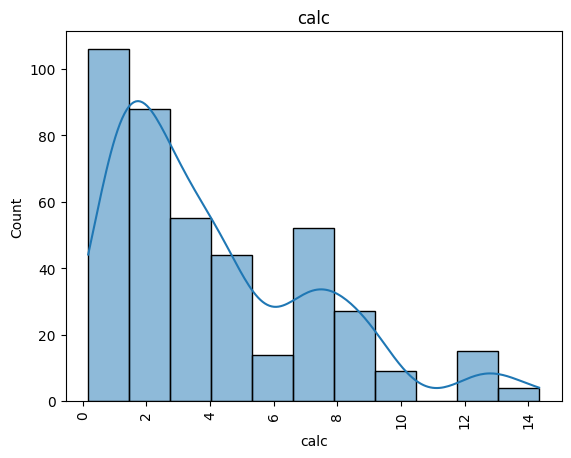

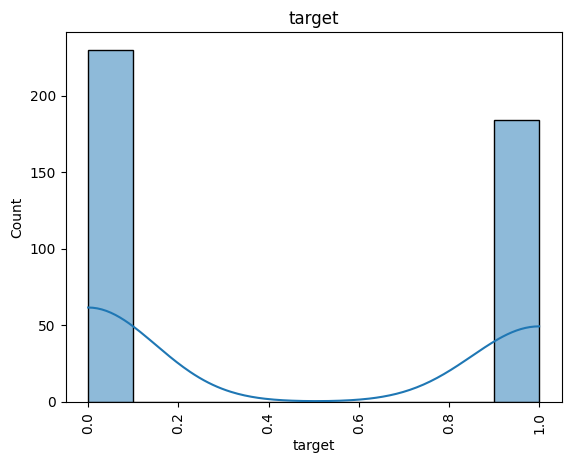

In [ ]:
for column in train.columns:
    if train[column].dtype in ['int64', 'float64']:
        sns.histplot(data = train[column], kde=True, multiple='stack')
        plt.xticks(rotation=90)
        plt.title(column)
        plt.show()


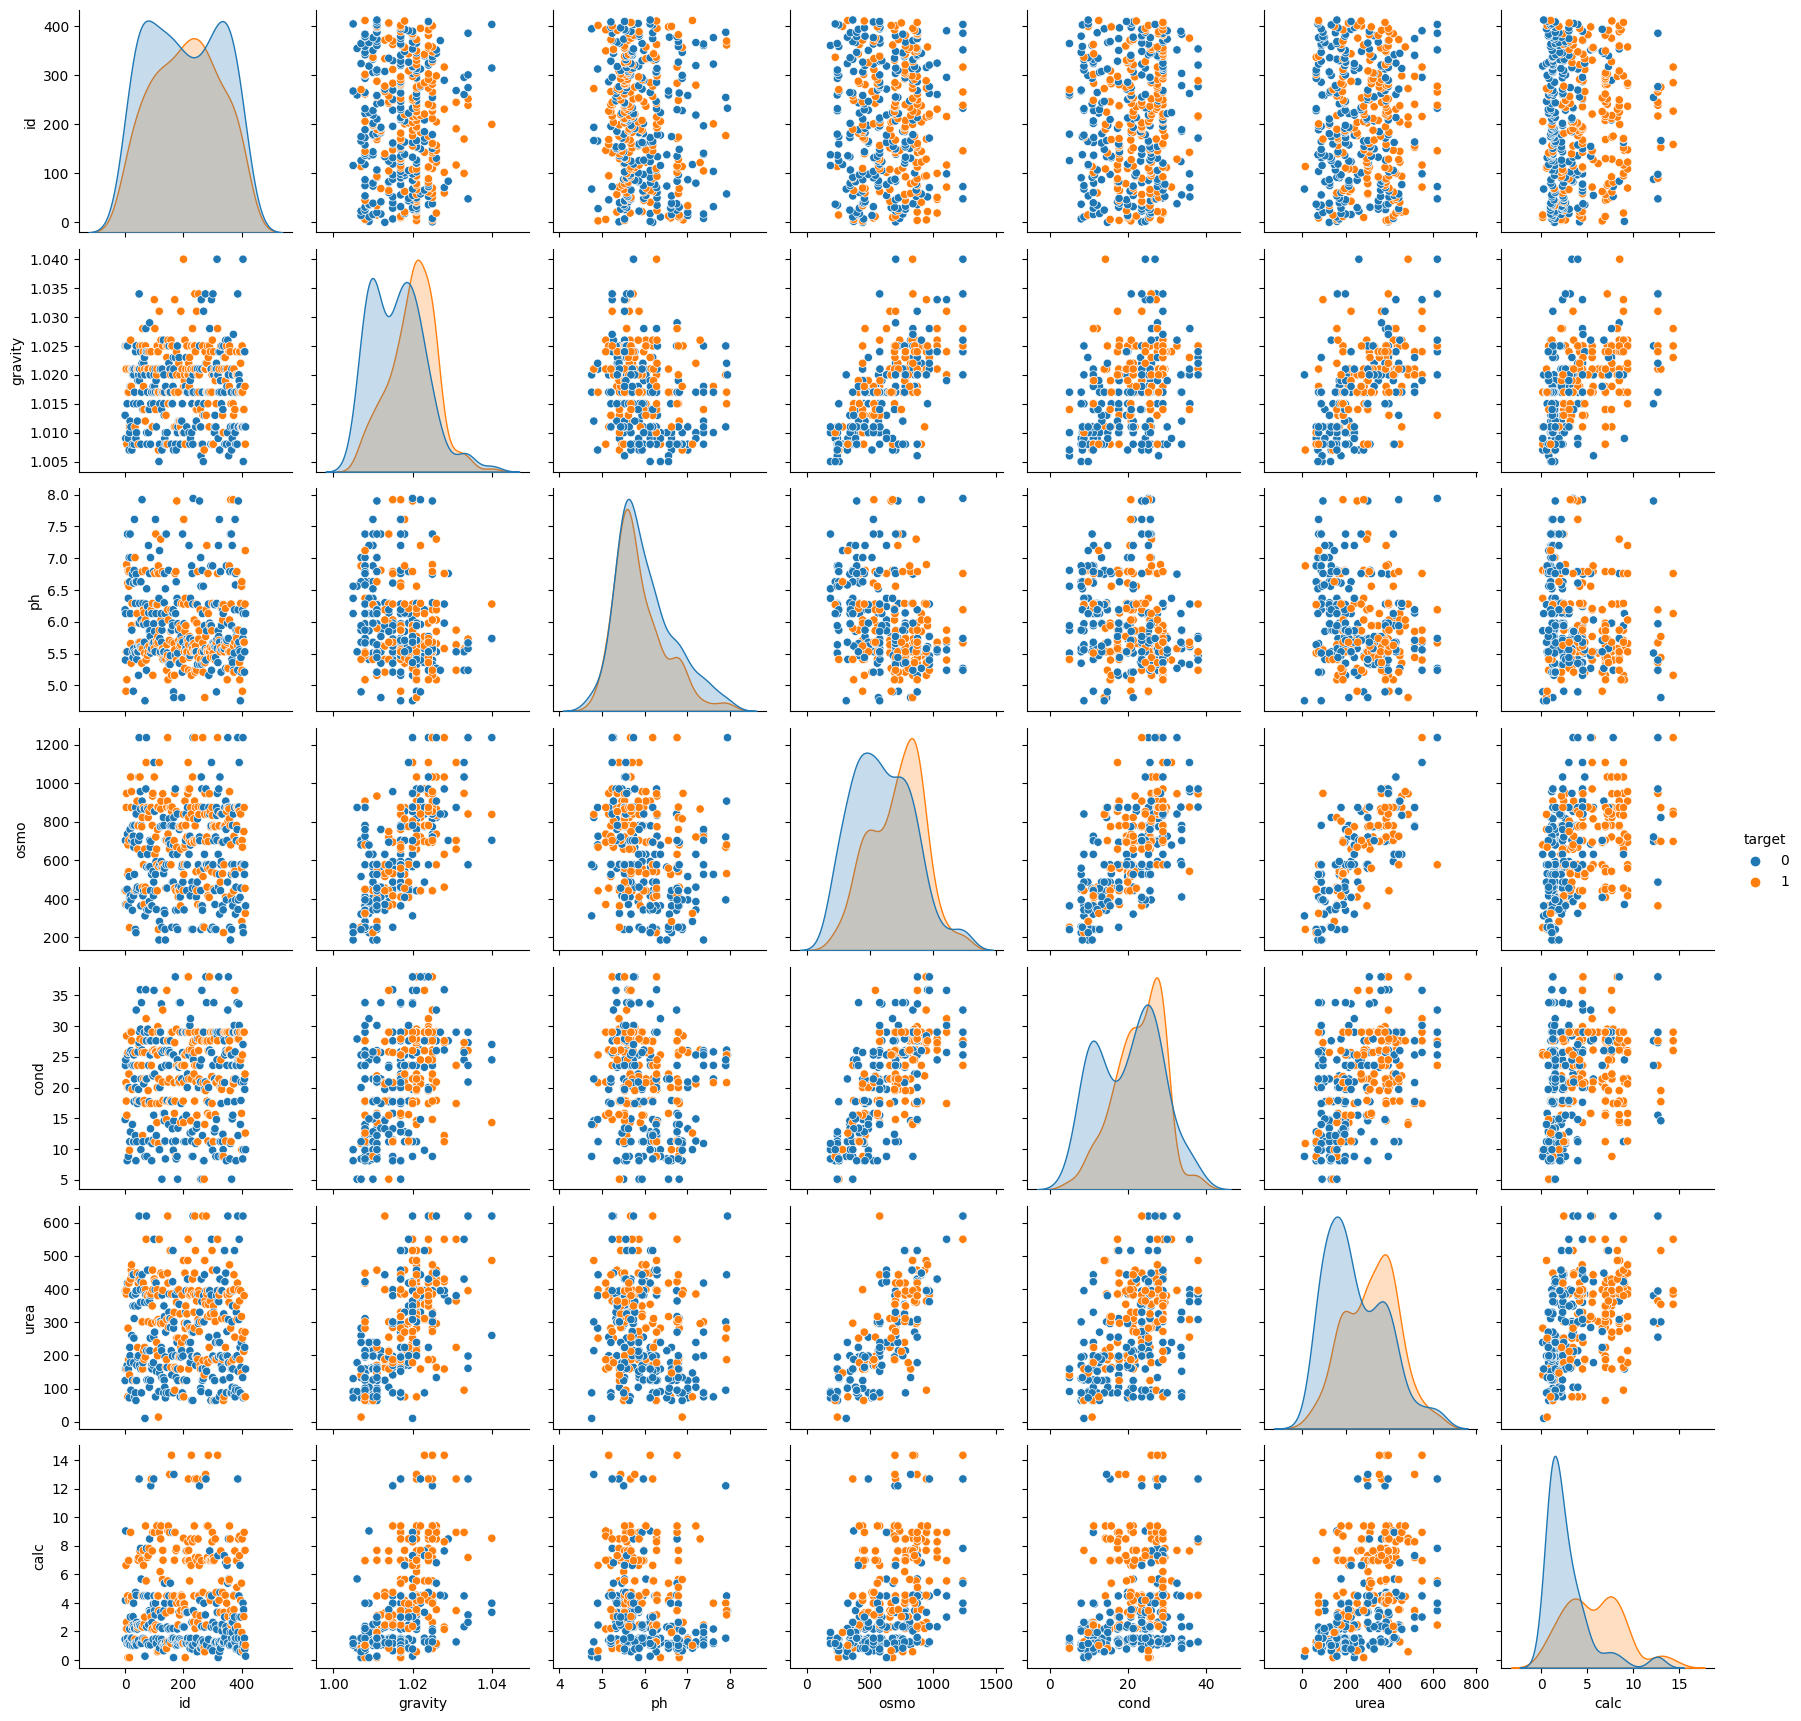

In [ ]:
sns.pairplot(train,hue='target', diag_kind="auto")

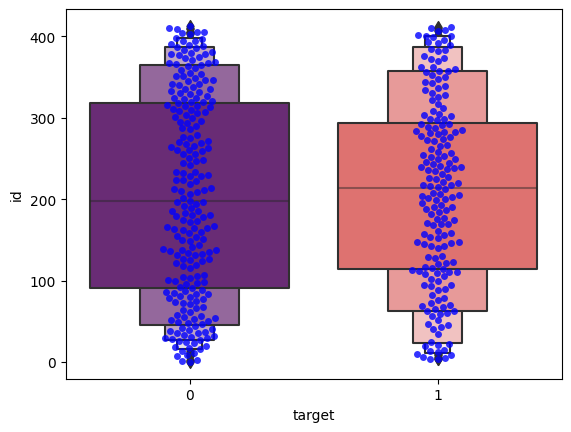

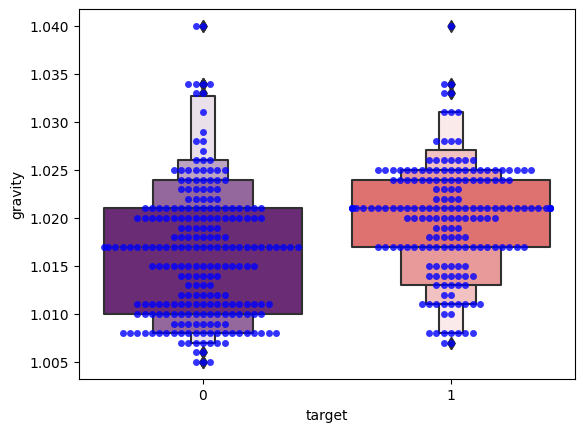

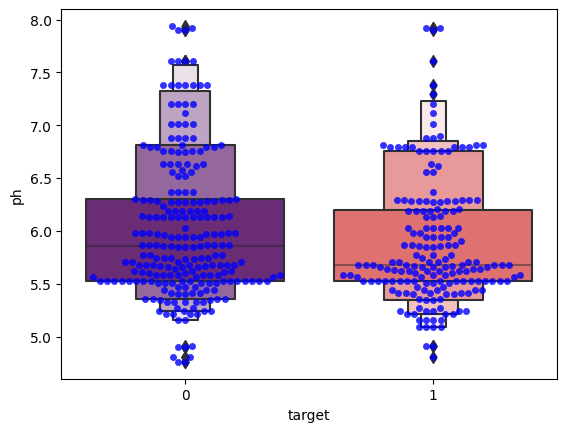

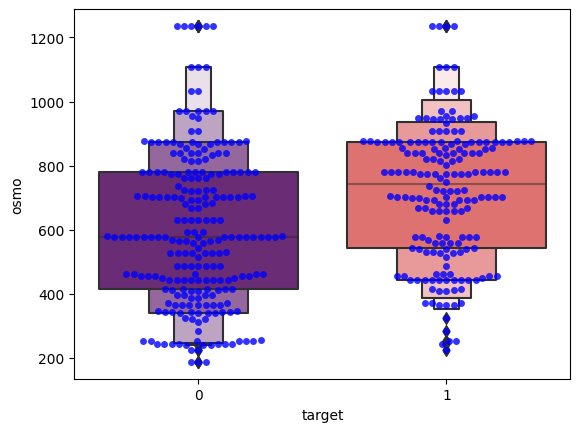

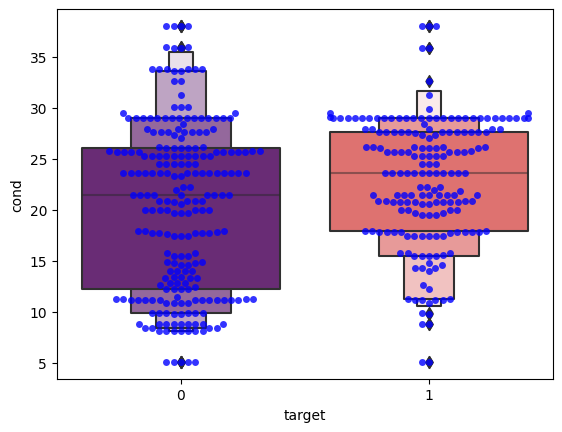

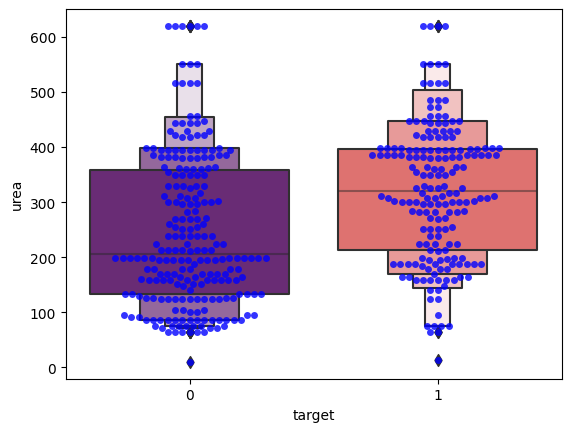

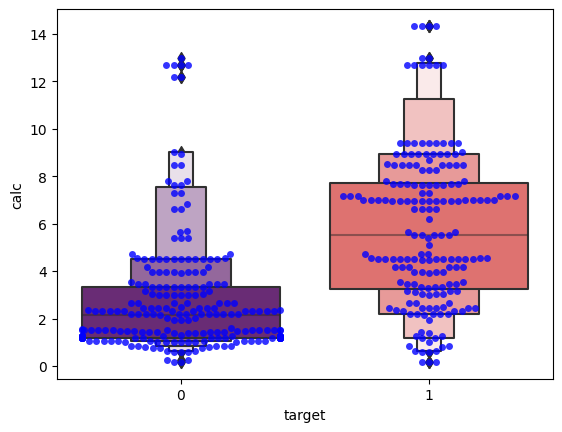

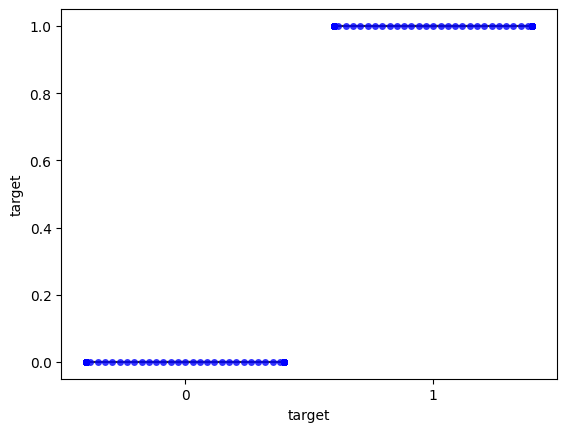

In [ ]:
for col in train:
  sns.swarmplot(x = train["target"], y = train[col], color = "blue", alpha = 0.8)
  sns.boxenplot(x = train["target"], y = train[col], palette ="magma")
  plt.show()

## Compute the correlation matrix

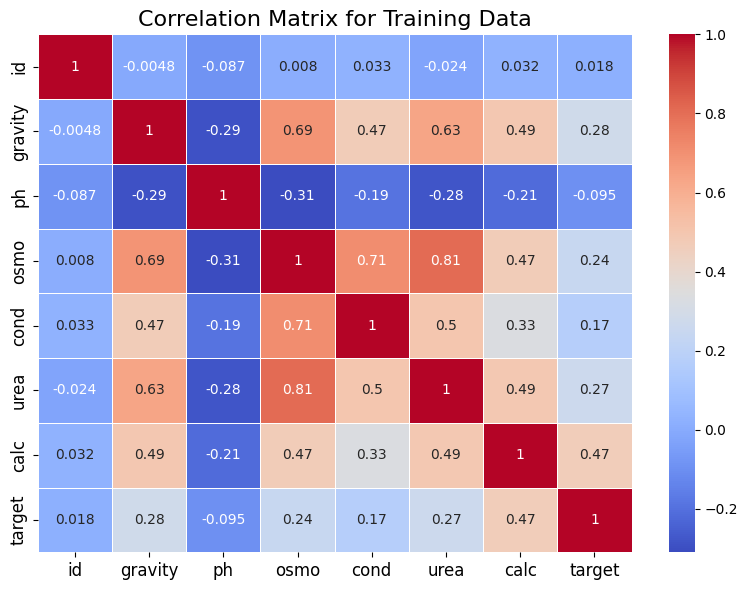

In [ ]:
corr_matrix = train.corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, cmap="coolwarm", annot=True, linewidths=0.5)
plt.title("Correlation Matrix for Training Data", fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

In [ ]:
corr_matrix['target']

id         0.018222
gravity    0.282577
ph        -0.094983
osmo       0.244770
cond       0.172224
urea       0.265211
calc       0.467439
target     1.000000
Name: target, dtype: float64

## Split data into input (X) and output (y) variables

In [ ]:
X = train.drop('target', axis=1)
y = train['target']

# Define features and scaled it

In [ ]:
#train.select_dtypes(include=['int64','float64']).columns
numerical_features =['gravity', 'ph', 'osmo', 'cond', 'urea', 'calc']

# Create a transformer for the numerical features
numerical_transformer = Pipeline(steps=[
    ('scaler', MinMaxScaler())  # Scale the data
])

# Define the preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features)
    ])

## Split data into training and testing sets

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define ensemble model and **fit**

In [ ]:
# Define ensemble model using VotingClassifier
model = Pipeline([
    ('preprocessing', preprocessor),
    ('voting', VotingClassifier(estimators=[
        ('gb', GradientBoostingClassifier()),
        ('rf', RandomForestClassifier()),
        ('mlp', MLPClassifier())], voting='soft'))
])

# Hyperparameter tuning using GridSearchCV with cross-validation and regularization
param_grid = {
    'voting__gb__n_estimators': [50, 100, 200],
    'voting__gb__learning_rate': [0.001, 0.01, 0.1],
    'voting__rf__n_estimators': [50, 100, 200],
    'voting__rf__max_depth': [5, 10, 20],
    'voting__rf__min_samples_split': [2, 5, 10],
    'voting__mlp__hidden_layer_sizes': [(50,), (100,), (200,)]
}

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=42)
search = GridSearchCV(model, param_grid, cv=cv, scoring='roc_auc', n_jobs=-1)

# Get the best estimator
search.fit(X_train, y_train)

# Get the best estimator
best_model = search.best_estimator_
best_model

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler())]),
                                                  ['gravity', 'ph', 'osmo',
                                                   'cond', 'urea', 'calc'])])),
                ('voting',
                 VotingClassifier(estimators=[('gb',
                                               GradientBoostingClassifier(learning_rate=0.001,
                                                                          n_estimators=50)),
                                              ('rf',
                                               RandomForestClassifier(max_depth=20,
                                                                      n_estimators=50)),
                                              ('mlp',
                                               MLPClassifier(hidden_layer_sizes=(50,)))],
                                  voting='soft'))])

## Predicting the target variable of the test set using the best model




In [ ]:
y_pred = best_model.predict(X_test)

## Calculate the confusion matrix

<Axes: >

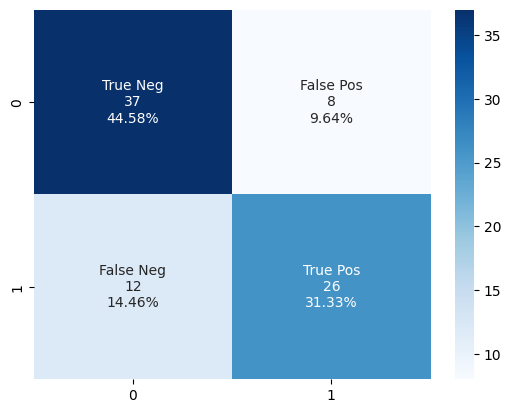

In [ ]:
c = confusion_matrix(y_test, y_pred)
group_names = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
group_counts = ["{0:0.0f}".format(value) for value in c.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
c.flatten()/np.sum(c)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
zip(group_names, group_counts, group_percentages)]
labels = np.asarray(labels).reshape(2, 2)
sns.heatmap(c, annot=labels, fmt='', cmap='Blues')

## Classification report

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.82      0.79        45
           1       0.76      0.68      0.72        38

    accuracy                           0.76        83
   macro avg       0.76      0.75      0.75        83
weighted avg       0.76      0.76      0.76        83



## Print the various scores

In [ ]:
# Calculate precision, recall, accuracy, and F1 score 

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Calculate the ROC curve and ROC AUC score 
y_pred_prob = best_model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = roc_auc_score(y_test, y_pred_prob)
# Calculate the Kappa score 
kappa = cohen_kappa_score(y_test, y_pred)
# Calculate the average precision score 
avg_precision = average_precision_score(y_test, y_pred_prob)
balanced_accuracy = balanced_accuracy_score(y_test, y_pred)


print("Precision:", precision)
print("Recall:", recall)
print("Accuracy:", accuracy)
print("F1 score:", f1)
print("ROC AUC Score:", roc_auc)
print("Balanced accuracy score:", balanced_accuracy)
print("Average Precision Score:", avg_precision)
print("Kappa score:", kappa)

Precision: 0.7647058823529411
Recall: 0.6842105263157895
Accuracy: 0.7590361445783133
F1 score: 0.7222222222222222
ROC AUC Score: 0.8567251461988303
Balanced accuracy score: 0.7532163742690059
Average Precision Score: 0.7766797278917185
Kappa score: 0.5106132075471698


## precision-recall curve

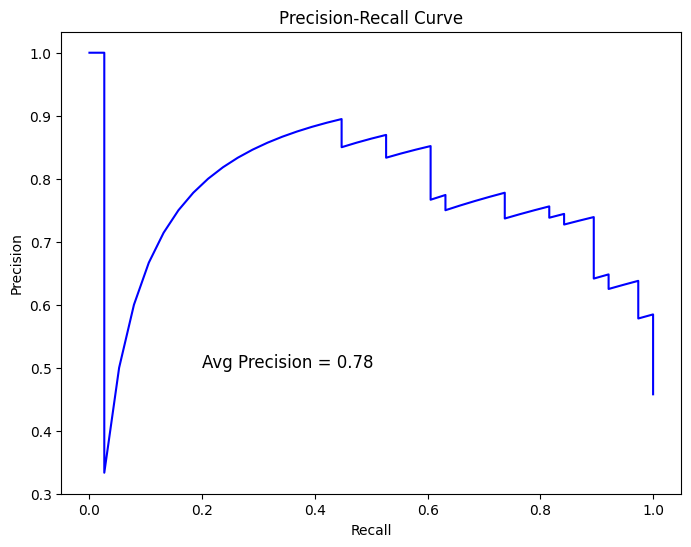

In [ ]:
precision, recall, thresholds = precision_recall_curve(y_test,y_pred_prob)
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')

# Add the average precision score to the plot
avg_precision = average_precision_score(y_test, y_pred_prob)
plt.text(0.2, 0.5, 'Avg Precision = {:.2f}'.format(avg_precision), fontsize=12)

plt.show()

## ROC curve

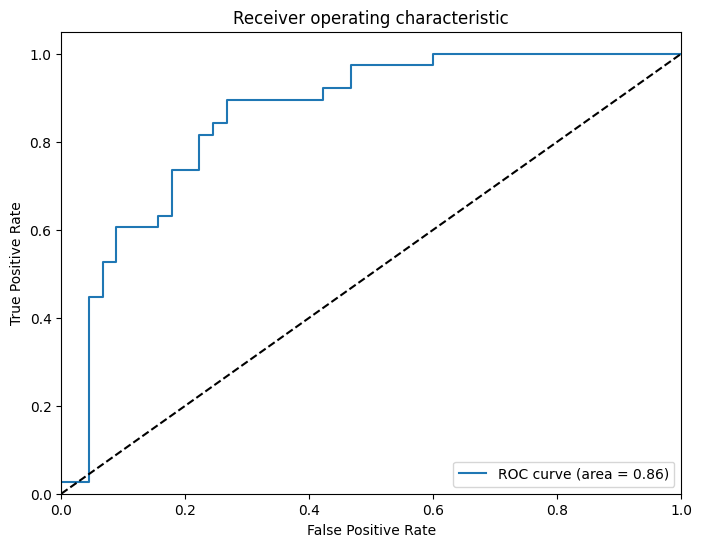

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

## Make predictions on the test data



In [ ]:
y_test_pred = best_model.predict(test)
submission=pd.DataFrame({'id':np.array(test['id']),'target':y_test_pred})
submission.to_csv('submission.csv',index=False)